<a href="https://colab.research.google.com/github/SpeedKillsx/TPs-Traitement-et-Analyse-D-images/blob/main/TAI_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP3 TAI réalisé par :
- LABCHRI Amayas

- KOULAL Yidhir Aghiles

- BAROUD Yasmine

- ABCI Fatima

# TP à rendre 3 Gradient, filtrage et morphologie
Dans ce TP, nous aimerions appliquer une analyse d'image en efféctuant:
- un calcul basique de gradient horizontal et vertical,
- un calcul du module et de l'orientation du gradient,
- un calcul du gradient en utilisant une convolution avec les filtres Sobel et Prewitt,
- un calcul du Laplacien du Gaussien (dérivée seconde de l'image)
- un filtrage de l'image avec un filtre médian, gaussien et un filtre moyen et comparer la difference,
- un seuillage de l'image,
- des morphologies mathématiques (dilatation et érosion),
L'objectif est d'observer le résultat pour chaque opération et de comparer les differentes méthodes.

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

In [ ]:
# préparation de l'image
image = np.zeros((8,8))
image[0,0]=0;image[0,1]=12;image[0,2]=53;image[0,3]=32;image[0,4]=190;image[0,5]=53;image[0,6]=174;image[0,7]=53;
image[1,0]=57;image[1,1]=32;image[1,2]=12;image[1,3]=227;image[1,4]=219;image[1,5]=202;image[1,6]=32;image[1,7]=154;
image[2,0]=65;image[2,1]=85;image[2,2]=93;image[2,3]=239;image[2,4]=251;image[2,5]=227;image[2,6]=65;image[2,7]=158;
image[3,0]=73;image[3,1]=146;image[3,2]=146;image[3,3]=247;image[3,4]=255;image[3,5]=235;image[3,6]=154;image[3,7]=130;
image[4,0]=97;image[4,1]=166;image[4,2]=117;image[4,3]=231;image[4,4]=243;image[4,5]=210;image[4,6]=117;image[4,7]=117;
image[5,0]=117;image[5,1]=190;image[5,2]=36;image[5,3]=146;image[5,4]=178;image[5,5]=93;image[5,6]=20;image[5,7]=170;
image[6,0]=130;image[6,1]=202;image[6,2]=73;image[6,3]=20;image[6,4]=12;image[6,5]=53;image[6,6]=85;image[6,7]=194;
image[7,0]=146;image[7,1]=206;image[7,2]=130;image[7,3]=117;image[7,4]=85;image[7,5]=166;image[7,6]=182;image[7,7]=215;
image

array([[  0.,  12.,  53.,  32., 190.,  53., 174.,  53.],
       [ 57.,  32.,  12., 227., 219., 202.,  32., 154.],
       [ 65.,  85.,  93., 239., 251., 227.,  65., 158.],
       [ 73., 146., 146., 247., 255., 235., 154., 130.],
       [ 97., 166., 117., 231., 243., 210., 117., 117.],
       [117., 190.,  36., 146., 178.,  93.,  20., 170.],
       [130., 202.,  73.,  20.,  12.,  53.,  85., 194.],
       [146., 206., 130., 117.,  85., 166., 182., 215.]])

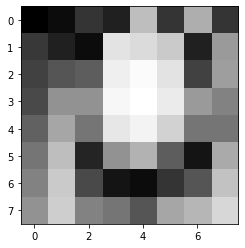

In [ ]:
plt.imshow(image,cmap='gray')

# Calcul du gradient de l'image

Définir d'abord une fonction de convolution  
**Astuce**: pour ajouter du padding il est possible d'utiliser la fonction cv.copyMakeBorder

In [ ]:
def padding2(image,padding,paddingv):
  imp = np.full((image.shape[0]+padding*2,image.shape[1]+padding*2),paddingv)
  imp[int(padding):int(-1*padding),int(padding):int(-1*padding)] = image
  return imp

In [ ]:

def convolution(image, kernel, padding=1, paddingv =0 , strides= 1):

    # Cross Correlation
    kernel = np.flipud((kernel))   
  
    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    ImageC = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
     
    if padding != 0: 
      imagePadded = padding2(image,padding,paddingv) 
    else: 
      imagePadded = image 
    # Iterate through image
    for y in range(image.shape[1]):
        
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        val = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                        if (val > 255):
                           ImageC[x, y] =255
                        elif (val < 0):
                           ImageC[x, y]  = 0
                        else:
                           ImageC[x, y] =val
                except:
                    break

    return ImageC


In [ ]:
#reference_shape: tuple of size of ndarray to create
def padding (image,value,reference_shape):
  return np.pad(image, reference_shape, mode='constant',constant_values=value)

Gradient par rapport à x  

In [ ]:
def gradient_X(image):
  image_pad=padding(image,0, [0,1])# ajoute de padding a l'image
  image_gradientX = np.zeros(image.shape)

  for i in range(image_pad.shape[0] -1):
    for j in range(image_pad.shape[1] -1):
      
      image_gradientX[i,j] = int(image_pad[i, j+1]) - int(image_pad[i][j])
    
  return image_gradientX

Gradient par rapport à y

In [ ]:
def gradient_Y(image):
  image_pad = padding(image, 0, [0,1])
  image_gradientY = np.zeros(image.shape)

  for i in range(image_pad.shape[0] -1):
    for j in range(image_pad.shape[1] -1):
       image_gradientY[i,j]=int(image_pad[i+1][j]) - int(image_pad[i][j])
      
  return image_gradientY


Gradient de X
 [[  12.   41.  -21.  158. -137.  121. -121.  -53.]
 [ -25.  -20.  215.   -8.  -17. -170.  122. -154.]
 [  20.    8.  146.   12.  -24. -162.   93. -158.]
 [  73.    0.  101.    8.  -20.  -81.  -24. -130.]
 [  69.  -49.  114.   12.  -33.  -93.    0. -117.]
 [  73. -154.  110.   32.  -85.  -73.  150. -170.]
 [  72. -129.  -53.   -8.   41.   32.  109. -194.]
 [  60.  -76.  -13.  -32.   81.   16.   33. -215.]]
Gradient de Y
 [[  57.   20.  -41.  195.   29.  149. -142.  101.]
 [   8.   53.   81.   12.   32.   25.   33.    4.]
 [   8.   61.   53.    8.    4.    8.   89.  -28.]
 [  24.   20.  -29.  -16.  -12.  -25.  -37.  -13.]
 [  20.   24.  -81.  -85.  -65. -117.  -97.   53.]
 [  13.   12.   37. -126. -166.  -40.   65.   24.]
 [  16.    4.   57.   97.   73.  113.   97.   21.]
 [-146. -206. -130. -117.  -85. -166. -182. -215.]]


Text(0.5, 1.0, 'Gradient_Y')

<Figure size 432x288 with 0 Axes>

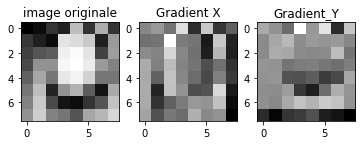

In [ ]:
GradX = gradient_X(image)
GradY = gradient_Y(image)

print('Gradient de X\n', GradX)
print('Gradient de Y\n', GradY)

plt.figure()
fig, axarr = plt.subplots(1,3)
axarr[0].imshow(image, cmap='gray')
axarr[0].set_title('image originale')
axarr[1].imshow(GradX, cmap='gray')
axarr[1].set_title('Gradient X')
axarr[2].imshow(GradY, cmap='gray')
axarr[2].set_title('Gradient_Y')

Magnitude du Gradient $Mod(G(i,j)) = \sqrt{(G_x(i,j)^2+G_y(j,j)^2} $

In [ ]:
def calcul_magnitude(GradX, GradY):
  magnitude = np.zeros(GradX.shape)
  for i in range(magnitude.shape[0] ):
    for j in range(magnitude.shape[1]):
       magnitude[i][j] = np.sqrt((GradX[i][j]*GradX[i][j]) + (GradY[i][j]*GradY[i][j]))
  return magnitude

In [ ]:
print('magnitude:')
Mod = calcul_magnitude(GradX, GradY)
print(Mod)

magnitude:
[[ 58.24946352  45.61797891  46.06517123 250.97609448 140.03570973
  191.94269978 186.56098199 114.06138698]
 [ 26.2488095   56.64803615 229.75204025  14.4222051   36.23534186
  171.82840277 126.38433447 154.05193929]
 [ 21.54065923  61.52235366 155.32224567  14.4222051   24.33105012
  162.19741058 128.72451204 160.46183347]
 [ 76.84399781  20.         105.0809212   17.88854382  23.32380758
   84.77027781  44.10215414 130.64838307]
 [ 71.84010022  54.56189146 139.84634425  85.84287973  72.89718787
  149.45902448  97.         128.44454056]
 [ 74.14849965 154.46682492 116.05602096 130.         186.49664876
   83.24061509 163.47782724 171.68575946]
 [ 73.75635566 129.0620006   77.83315489  97.32933782  83.72574276
  117.44360349 145.91093174 195.13328778]
 [157.84802818 219.57231155 130.64838307 121.29715578 117.41379817
  166.76930173 184.96756472 304.05591591]]


Orientation du gradient $\theta = tan^{-1}\left( \frac{G_y(i,j) }{G_x(j,j)}\right) $  
**Astuce** Il est possible d'utiliser la fonction np.arctan2, mais elle retourne les valeurs en radians. Il est possible de les convertir en degrees soit manuellement, soit en utilisant math.degrees

In [ ]:
def calcule_direction(GradX, GradY):
    direction= np.zeros(GradX.shape)
    for i in range(GradX.shape[0]):
      for j in range(GradX.shape[1]):
        direction[i][j] = np.rad2deg(np.arctan(GradY[i][j]/GradX[i][j]))
    return direction

Direction:
[[ 78.11134196  26.00334584  62.8786966   50.98365758 -11.95187513
   50.92062071  49.56526238 -62.31164611]
 [-17.74467163 -69.32557524  20.64360875 -56.30993247 -62.02052561
   -8.36588612  15.1358355   -1.48786753]
 [ 21.80140949  82.52844082  19.95159069  33.69006753  -9.46232221
   -2.82712458  43.74095479  10.04934859]
 [ 18.19916505  90.         -16.0202923  -63.43494882  30.96375653
   17.15242174  57.0305961    5.71059314]
 [ 16.16449915 -26.09542416 -35.39479584 -81.96428929  63.08344538
   51.51980175 -90.         -24.37012005]
 [ 10.09750438  -4.45560283  18.59106773 -75.7499673   62.88536588
   28.7203268   23.42869281  -8.03571071]
 [ 12.52880771  -1.77604425 -47.08256528 -85.28524548  60.67952412
   74.18862907  41.66614934  -6.1780649 ]
 [-67.65935204  69.74936649  84.28940686  74.70345269 -46.38035407
  -84.49452214 -79.72285942  45.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


Text(0.5, 1.0, 'Gradient Y')

<Figure size 432x288 with 0 Axes>

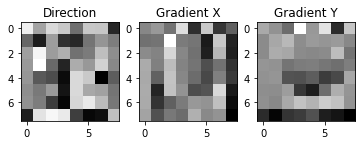

In [ ]:
print('Direction:')
print(calcule_direction(GradX, GradY))
x = calcule_direction(GradX,GradY)
plt.figure()
fig , axarr = plt.subplots(1,3)
axarr[0].imshow(x, cmap='gray')
axarr[0].set_title('Direction')
axarr[1].imshow(GradX, cmap='gray')
axarr[1].set_title('Gradient X')
axarr[2].imshow(GradY, cmap='gray')
axarr[2].set_title('Gradient Y')


# Binarisation de l'image  
D'abord binariser l'image en fonction de la magnitude comme vu en TD (G(i,j)>70)  
Ensuite binariser en fonction du niveau de gris (I(x,y)>70)  
Observer la difference entre les deux résultats,   
Qu'obtient-on  de chaque binarisation?

D'abord binariser l'image en fonction de la magnitude comme vu en TD (G(i,j)>70)


In [ ]:
def Binarisation(mode , seuil):
  image_binariser = np.zeros(mode.shape)
  for i in range(mode.shape[0]):
   for j in range (mode.shape[1]):
     if mode[i][j] < seuil:
       image_binariser[i][j] = 0
     else:
       image_binariser[i][j] = 1
  return image_binariser

In [ ]:
binarisation = Binarisation(Mod, 70)
binarisation

array([[0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 1., 1., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

Ensuite binariser en fonction du niveau de gris (I(x,y)>70)  


In [ ]:
binarisation_NiveauDeGris = Binarisation(image, 70)
binarisation_NiveauDeGris

array([[0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1.],
       [0., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 0., 1.],
       [1., 1., 1., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

Qu'obtient-on de chaque binarisation?

Quand on applique un seuil en fonction de magnitude on obtien les countours

et lorsqu'on applique le seuil en fonction de niveau de gris c'est pour d'éclaircir les pixels clairs et la mm chose pour les pix non éclairé

In [ ]:
diamond = [[0,1,0],
          [1,1,1],
          [0,1,0]
          ]

# Dilatation avec un élement structurant de type diamond

In [ ]:
def Delatation_diamond(image_binariser): # Application d'un ou logique entre les anciennes valeurs de la matrice est la structure diamant

  delatation_diamond = np.copy(image_binariser)
  for i in range( image_binariser.shape[0]-2):
    for j in range( image_binariser.shape[1]-2):
      value_or =  image_binariser[i,j+1] or image_binariser[i+1,j] or image_binariser[i+2,j+1] or image_binariser[i+1,j+2] or image_binariser[i+1,j+1] or 0 
      delatation_diamond[i+1][j] = value_or
      delatation_diamond[i][j+1] = value_or
      delatation_diamond[i+1][j+2] = value_or
      delatation_diamond[i+2][j+2] = value_or
      delatation_diamond[i+1][j+1] = value_or
      
  return delatation_diamond

In [ ]:
dilatation = Delatation_diamond(binarisation)
dilatation


array([[0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

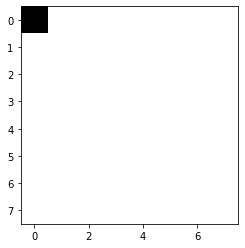

In [ ]:
plt.imshow(dilatation, cmap="gray")

# Erosion avec un élément structurant de type carré 

In [ ]:
carre = [[1,1,1],
          [1,1,1],
          [1,1,1]
          ]

In [ ]:
def Erosion_Carre(matrice_binaire):# Application d'un et logique entre les anciennes valeurs de la matrice est la structure carree
  erosion_carre = np.copy(matrice_binaire)
  for i in range(matrice_binaire.shape[0] - 2):
    for j in range(matrice_binaire.shape[1] -2):
      value = int(matrice_binaire[i][j] and matrice_binaire[i][j+1] and matrice_binaire[i][j+2] and matrice_binaire[i+1][j] and matrice_binaire[i+1][j+1] and matrice_binaire[i+1][j+2] and matrice_binaire[i+2][j] and matrice_binaire[i+2][j+1] and matrice_binaire[i+2][j+2])  
      erosion_carre[i][j] = value
      erosion_carre[i][j+1] = value
      erosion_carre[i][j+2] = value
      erosion_carre[i+1][j] = value
      erosion_carre[i+1][j+1] = value
      erosion_carre[i+1][j+2] = value
      erosion_carre[i+2][j+1] = value
      erosion_carre[i+2][j] = value
      erosion_carre[i+2][j+2] = value
  return erosion_carre


In [ ]:
erosion = Erosion_Carre(binarisation)
print('erosion\n',erosion)

erosion
 [[0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


comparer avec opencv

In [ ]:
kernel = np.ones((3,3), np.uint8)
# imageB est l'image après seuillage
imageDI = cv.dilate(binarisation, kernel, iterations=1)
imagzER = cv.erode(binarisation,kernel , iterations=1)

In [ ]:
print('dilatation:\n',imageDI)
print('erosion:\n',imagzER)

dilatation:
 [[0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]
erosion:
 [[0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


# Dérivé avec filtres Prewitt et Sobel

D'abord définir les filtres

In [ ]:
#Prewitt
c=1
# commenter et décommenter c au besoin
filtreP_x = np.array([[-1,0,1],[-c,0,c],[1,0,1]])
filtreP_y = np.array([[-1,-c,-1],[0,0,0],[1,c,1]])
#Sobel
c=2
filtreS_x = np.array([[-1,0,1],[-c,0,c],[1,0,1]])
filtreS_y = np.array([[-1,-c,-1],[0,0,0],[1,c,1]])

Ensuite appliquer le filtre avec une convolution pour calculer la dérivé avec filtre Prewitt

dérivé par rapport à x

In [ ]:
print("prewitt : ")
print("filtreP_x : ")
print(convolution(image,filtreP_x))

prewitt : 
filtreP_x : 
[[ 44.   8. 215. 255.   0.   0.   0.   0.]
 [129.  36. 255. 255.  48.   0.   0.  77.]
 [255. 170. 255. 255. 255.   0. 182.   0.]
 [255. 251. 255. 255. 255.  89. 187.   0.]
 [255. 158. 255. 255. 255. 125. 255.  17.]
 [255.  76. 171. 255. 255. 255. 255.  12.]
 [255.  80.  65. 108. 255. 255. 255.   0.]
 [255. 187. 133.  40. 122. 194. 255.   0.]]


dérivé par rapport à y

In [ ]:
print("filtreP_y : ")
print(convolution(image,filtreP_y))

filtreP_y : 
[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   4.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  33.   0.   6.   0.]
 [  0.  22. 167. 255. 255. 255. 236.  94.]
 [  0.   0. 219. 255. 255. 255. 112.   0.]
 [  0.   0.   0.  28.  49.   0.   0.   0.]
 [255. 255. 255. 105.  85. 150. 255. 255.]]


Et appliquer le filtre avec une convolution pour calculer la dérivé avec filtre Sobel

dérivé par rapport à x

In [ ]:
print("sobel : ")
print("filtreS_x : ")
print(convolution(image,filtreS_x))


sobel : 
filtreS_x : 
[[ 56.  61. 235. 255.  17.   0.   0.   0.]
 [161.   0. 255. 255.  23.   0.   0.  45.]
 [255. 198. 255. 255. 255.   0. 113.   0.]
 [255. 255. 255. 255. 255.   0.  82.   0.]
 [255. 178. 255. 255. 255.   0. 255.   0.]
 [255.   0. 127. 255. 255. 117. 255.   0.]
 [255.  23.   0.  47. 255. 255. 255.   0.]
 [255. 171.  44.   0. 171. 255. 255.   0.]]


dérivé par rapport à y

In [ ]:
print("filtreS_y : ")
print(convolution(image,filtreS_y))

filtreS_y : 
[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  41.   0.   0.  30.]
 [  0.   0. 255. 255. 255. 255. 255.  54.]
 [  0.   0. 255. 255. 255. 255. 144.   0.]
 [  0.   0.   0.  57. 142.   0.   0.   0.]
 [255. 255. 255. 125.  97. 203. 255. 255.]]


# Comparer vos résultats avec opencv

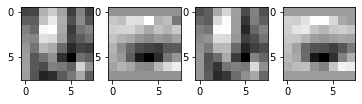

In [ ]:
Gx_Prewitt_cv=cv.filter2D(image,-1,kernel=filtreP_x)
Gy_Prewitt_cv=cv.filter2D(image,-1,kernel=filtreP_y)
Gx_Sobel_cv=cv.filter2D(image,-1,kernel=filtreS_x)
Gy_Sobel_cv=cv.filter2D(image,-1,kernel=filtreS_y)
plt.subplot(141)
plt.imshow(Gx_Prewitt_cv,cmap='gray')
plt.subplot(142)
plt.imshow(Gy_Prewitt_cv,cmap='gray')
plt.subplot(143)
plt.imshow(Gx_Sobel_cv,cmap='gray')
plt.subplot(144)
plt.imshow(Gy_Sobel_cv,cmap='gray')

In [ ]:
print(Gx_Prewitt_cv)

[[  64.   77.  474.  575.  425.   48.  308.   64.]
 [ 170.  166.  539.  688.  462.  113.  337.  130.]
 [ 292.  202.  742.  766.  445.   36.  248.  308.]
 [ 332.  315.  652.  627.  417.   73.  153.  234.]
 [ 380.  246.  502.  449.  206.  -29.   65.   40.]
 [ 404.  142.  243.  353.   -1. -187.  231.  170.]
 [ 412.  138.   97.  296.  263.  182.  599.  364.]
 [ 404.  130.  -49.  -21.  155.  267.  437.  170.]]


# Deuxième dérivé de l'image
Convolution avec l'opérateur Laplacien

In [ ]:
filtre_Lap = np.array([[0,1,0],[1,-4,1],[0,1,0]])

Appliquer la convolution 

In [ ]:
print("laplacian : ")
laplacian = convolution(image,filtre_Lap)
print(convolution(image,filtre_Lap))

laplacian : 
[[ 69.  37.   0. 255.   0. 255.   0. 116.]
 [  0.  38. 255.   0.   0.   0. 255.   0.]
 [  0.   0. 110.   0.   0.   0. 255.   0.]
 [ 16.   0.  19.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.   0.   0.  33.   0.]
 [  0.   0. 255.   0.   0.  89. 255.   0.]
 [  0.   0.  96. 255. 255. 144. 109.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


Text(0.5, 1.0, ' Laplacian filtre')

<Figure size 432x288 with 0 Axes>

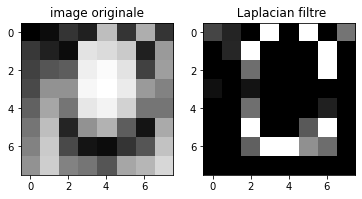

In [ ]:
plt.figure()
fig, axarr= plt.subplots(1,2)
axarr[0].imshow(image, cmap='gray')
axarr[0].set_title('image originale')
axarr[1].imshow(laplacian, cmap='gray')
axarr[1].set_title(' Laplacian filtre')

In [ ]:
#Opencv
imageLaplacian = cv.Laplacian(image,cv.CV_64F)
laplacian_cv=cv.filter2D(image,-1,kernel=filtre_Lap)

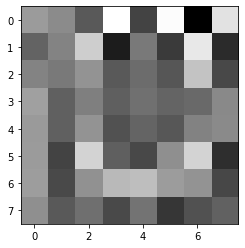

In [ ]:
plt.imshow(imageLaplacian, cmap="gray")

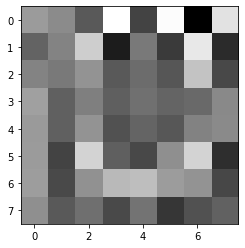

In [ ]:
plt.imshow(laplacian_cv, cmap="gray")

In [ ]:
moy =[[1/9,1/9,1/9],
        [1/9,1/9,1/9],
        [1/9,1/9,1/9]
        ]

In [ ]:
def Filtre_Moyen(image):
  image_copy = np.copy(image)
  image_pad = padding(image_copy, 0, [1,1])
  # creation de la matrice
  f_moy = np.zeros(image.shape)

 # Calcule de la valeur du gradient par rapport a X
  for i in range(0, image_pad.shape[0] -1):
    for j in range (0, image_pad.shape[1] -1):
      val = int(image_pad[i,j]/9 + image_pad[i-1,j-1]/9 +image_pad[i-1,j]/9 +image_pad[i-1,j+1]/9 +image_pad[i,j-1]/9 + image_pad[i,j+1]/9 + image_pad[i+1,j-1]/9 + image_pad[i+1,j]/9 +image_pad[i+1,j+1]/9 ) 

      if (val > 255):
        f_moy[i-1,j-1] =255
      elif (val < 0):
        f_moy[i-1,j-1]  = 0
      else:
        f_moy[i-1,j-1] =val
      
  return f_moy

filtre moyan:
 [[ 11.  18.  40.  81. 102.  96.  74.  45.]
 [ 27.  45.  87. 146. 182. 157. 124.  70.]
 [ 50.  78. 136. 187. 233. 182. 150.  77.]
 [ 70. 109. 163. 202. 237. 195. 157.  82.]
 [ 87. 120. 158. 177. 204. 167. 138.  78.]
 [100. 125. 131. 117. 131. 112. 117.  78.]
 [110. 136. 124.  88.  96.  97. 130.  96.]
 [ 76.  98.  83.  48.  50.  64.  99.  75.]]


Text(0.5, 1.0, ' Moyen filtre')

<Figure size 432x288 with 0 Axes>

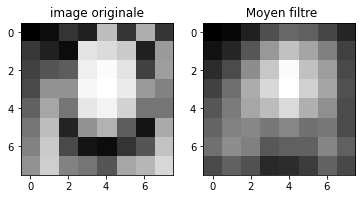

In [ ]:
moyen = Filtre_Moyen(image)
print('filtre moyan:\n',moyen )
plt.figure()
fig, axarr= plt.subplots(1,2)
axarr[0].imshow(image, cmap='gray')
axarr[0].set_title('image originale')
axarr[1].imshow(moyen, cmap='gray')
axarr[1].set_title(' Moyen filtre')

In [ ]:
moyen = convolution(image, moy)
print(moyen)

[[ 11.22222222  18.44444444  40.88888889  81.44444444 102.55555556
   96.66666667  74.22222222  45.88888889]
 [ 27.88888889  45.44444444  87.22222222 146.22222222 182.22222222
  157.         124.22222222  70.66666667]
 [ 50.88888889  78.77777778 136.33333333 187.66666667 233.55555556
  182.22222222 150.77777778  77.        ]
 [ 70.22222222 109.77777778 163.33333333 202.44444444 237.55555556
  195.22222222 157.          82.33333333]
 [ 87.66666667 120.88888889 158.33333333 177.66666667 204.22222222
  167.22222222 138.44444444  78.66666667]
 [100.22222222 125.33333333 131.22222222 117.33333333 131.77777778
  112.33333333 117.66666667  78.11111111]
 [110.11111111 136.66666667 124.44444444  88.55555556  96.66666667
   97.11111111 130.88888889  96.22222222]
 [ 76.          98.55555556  83.11111111  48.55555556  50.33333333
   64.77777778  99.44444444  75.11111111]]


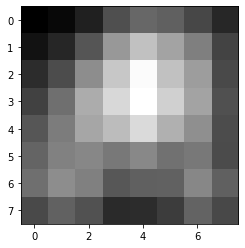

In [ ]:
plt.imshow(moyen,cmap="gray")

In [ ]:
# taille de fenetre F
F=3
filtreMoy = np.ones((F,F),np.float32)/(F*F)
imageMoy=cv.filter2D(image,-1,filtreMoy)
# ou bien utiliser la fonction cv.blur
imageMoy = cv.blur(image,(F,F))

Text(0.5, 1.0, ' Moyen filtre')

<Figure size 432x288 with 0 Axes>

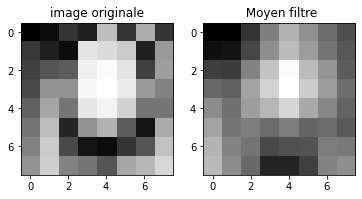

In [ ]:
plt.figure()
fig, axarr= plt.subplots(1,2)
axarr[0].imshow(image, cmap='gray')
axarr[0].set_title('image originale')
axarr[1].imshow(imageMoy, cmap='gray')
axarr[1].set_title(' Moyen filtre')

In [ ]:
from math import exp
sigma=1
F=3
# caluler le filtre avec la formule donnée en cours/TD

C = (1/(2*3.14*sigma*sigma))
gausx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
gausy = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

gauss=(-(gausx*gausx+gausy*gausy))/(2*sigma*sigma)

Kernelgauss= C*(np.exp(gauss))
Kernelgauss

array([[0.05857953, 0.09658132, 0.05857953],
       [0.09658132, 0.15923567, 0.09658132],
       [0.05857953, 0.09658132, 0.05857953]])

In [ ]:
gauss = convolution(image , Kernelgauss)
gauss

array([[  8.53865567,  14.16222731,  29.02014207,  64.02063073,
         84.74611478,  77.80797661,  61.88954014,  41.99270677],
       [ 24.127035  ,  33.48832032,  62.58352731, 119.0165005 ,
        151.17567612, 123.28436311,  91.32397263,  61.99205999],
       [ 41.54245738,  62.85725808,  99.55496395, 154.08310294,
        184.12053997, 147.53471623, 107.73408977,  69.76190705],
       [ 56.07471066,  90.43321054, 123.72278103, 164.69352408,
        188.00009188, 158.72793636, 119.06089697,  72.79549543],
       [ 69.51152979, 101.34442913, 117.2556313 , 145.53558011,
        165.34217734, 135.44520934, 103.8057563 ,  69.09781972],
       [ 80.46224832, 105.00130584,  92.79498425,  94.22660957,
        106.1649966 ,  86.10374821,  81.71967452,  70.87154387],
       [ 88.80844195, 115.1484308 ,  87.70166365,  61.92562896,
         64.94066401,  70.06191959,  94.62525897,  88.11800274],
       [ 67.53279439,  90.86006081,  71.95149318,  46.30644228,
         46.30282545,  63.0213561

In [ ]:
def Filtre_gauss(image):
  image_copy = np.copy(image)
  image_pad = padding(image_copy, 0, [1,1])
  # creation de la matrice
  f_gauss = np.zeros(image.shape)

 # Calcule de la valeur du gradient par rapport a X
  for i in range(0, image_pad.shape[0] -2):
    for j in range (0, image_pad.shape[1] -2):
      val = int((image_pad[i][j] *0.06) + (0.09* image_pad[i][j+1]) + (0.06* image_pad[i][j+2]) +(0.09*image_pad[i+1][j]) + (0.015*image_pad[i+1][j+1]) + (0.09*image_pad[i+1][j+2]) + (0.06*image_pad[i+2][j]) +(0.09*image_pad[i+2][j+1]) + (0.06*image_pad[i+2][j+2]))

      if (val > 255):
        f_gauss[i,j] =255
      elif (val < 0):
        f_gauss[i,j]  = 0
      else:
        f_gauss[i,j] =val
      
  return f_gauss

[[  8.  11.  21.  56.  55.  66.  36.  32.]
 [ 15.  28.  58.  83. 114.  91.  83.  38.]
 [ 31.  48.  83. 115. 143. 110.  95.  44.]
 [ 43.  66.  99. 124. 146. 120.  94.  51.]
 [ 53.  74.  97. 108. 125. 101.  84.  49.]
 [ 61.  74.  85.  70.  77.  70.  76.  44.]
 [ 67.  82.  75.  57.  61.  60.  80.  57.]
 [ 44.  58.  50.  28.  32.  37.  59.  42.]]


Text(0.5, 1.0, 'Le resultat du filtre gaussien ')

<Figure size 432x288 with 0 Axes>

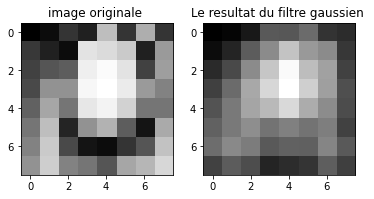

In [ ]:
g = Filtre_gauss(image)
print(g)
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(g, cmap='gray')
axarr[1].set_title("Le resultat du filtre gaussien ")

In [ ]:
imageG= cv.GaussianBlur(image, (F,F),cv.BORDER_DEFAULT)
imageG

array([[ 29.41647489,  29.5369477 ,  70.12772626, 132.20836606,
        174.05878298, 146.96206637, 116.69718099,  93.7001438 ],
       [ 42.18815536,  45.2956181 ,  86.88818868, 146.50275883,
        182.96762114, 156.98075826, 123.91395358, 100.70878501],
       [ 79.93447347,  78.89357901, 135.8105468 , 188.25940168,
        233.69791327, 182.61968728, 150.06499638, 105.24237106],
       [114.03179474, 110.13861798, 163.03787939, 202.96851615,
        237.76698473, 195.7261999 , 156.69921025, 120.09949614],
       [142.93973591, 121.43489413, 157.85566251, 178.1870959 ,
        204.69155455, 167.58838586, 138.1117017 , 111.35292223],
       [161.76024174, 125.85500502, 130.55790666, 117.51951539,
        131.98775704, 112.23796738, 116.96179144, 103.04186283],
       [176.09342891, 137.30583293, 123.70434479,  88.05302778,
         95.89759872,  96.68954413, 130.30941384, 128.72040731],
       [180.24843744, 144.35902544, 116.00670616,  60.66935284,
         60.18921567,  82.2008371

In [ ]:
def Median(image):
  image_pad = padding(image, 0, [1,1])
  median = np.copy(image)

  for i in range(1,image_pad.shape[0] -1):
     for j in range(1,image_pad.shape[1] -1):
    
       kernel_median = [image_pad[i][j], image_pad[i][j-1], image_pad[i][j+1],image_pad[i-1][j-1], image_pad[i-1][j], image_pad[i-1][j+1], image_pad[i+1][j-1],image_pad[i+1][j], image_pad[i+1][j+1] ]
       kernel_median.sort()
       pixel_central=kernel_median[4]
       median[i-1][j-1] = pixel_central
  return median

median:
 [[  0.  12.  12.  32.  53.  53.  53.   0.]
 [ 12.  53.  53. 190. 219. 190. 154.  53.]
 [ 57.  73. 146. 227. 235. 219. 154.  65.]
 [ 73.  97. 146. 239. 239. 227. 154. 117.]
 [ 97. 117. 146. 178. 231. 178. 130. 117.]
 [117. 117. 146. 117. 146.  93. 117.  85.]
 [130. 130. 130.  85.  93.  85. 166.  85.]
 [  0. 130.  73.  20.  20.  53.  85.   0.]]


Text(0.5, 1.0, 'Le resultat du filtre median')

<Figure size 432x288 with 0 Axes>

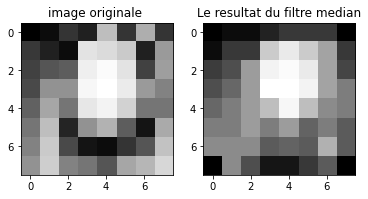

In [ ]:
median = Median(image)
print('median:\n', median)
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(median, cmap='gray')
axarr[1].set_title('Le resultat du filtre median')

In [ ]:
image_= np.uint8(image)
imageMed = cv.medianBlur(image_,F)
imageMed


array([[ 12,  12,  32,  53, 190, 174,  53,  53],
       [ 57,  53,  53, 190, 219, 190, 154, 154],
       [ 65,  73, 146, 227, 235, 219, 154, 154],
       [ 85,  97, 146, 239, 239, 227, 154, 130],
       [117, 117, 146, 178, 231, 178, 130, 130],
       [130, 117, 146, 117, 146,  93, 117, 117],
       [146, 130, 130,  85,  93,  85, 166, 182],
       [146, 146, 130,  85,  85,  85, 182, 194]], dtype=uint8)

In [ ]:
image1 = cv.imread('/content/drive/MyDrive/TAI_ressources/TP2/im4.jpg',0)
image2 = cv.imread('/content/drive/MyDrive/TAI_ressources/TP2/im3.jpg',0)
image3 = cv.imread('/content/drive/MyDrive/TAI_ressources/TP2/Fig0228(a).tif',0)
image4 = cv.imread('/content/drive/MyDrive/TAI_ressources/TP2/im1.png',0)
image5 = cv.imread('/content/drive/MyDrive/TAI_ressources/TP2/im2.png',0)

In [ ]:
image1_bin=Binarisation(image1,70)
image2_bin=Binarisation(image2,70)
image3_bin=Binarisation(image3,70)
image4_bin=Binarisation(image4,70)
image5_bin=Binarisation(image5,70)

Text(0.5, 1.0, 'Le resultat binarisation')

<Figure size 432x288 with 0 Axes>

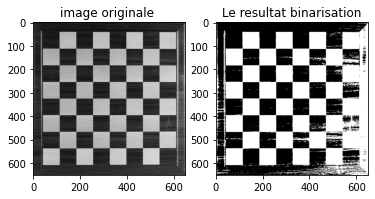

<Figure size 432x288 with 0 Axes>

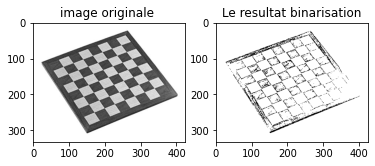

<Figure size 432x288 with 0 Axes>

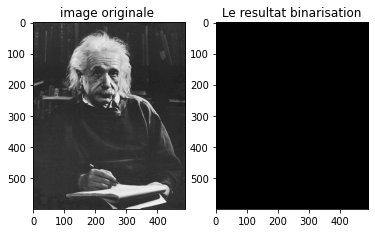

<Figure size 432x288 with 0 Axes>

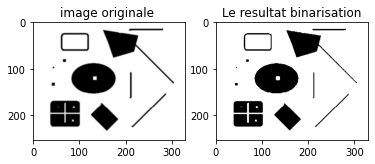

<Figure size 432x288 with 0 Axes>

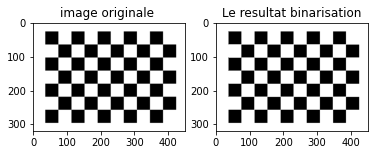

In [ ]:
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image1, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(image1_bin, cmap='gray')
axarr[1].set_title('Le resultat binarisation')
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image2, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(image2_bin, cmap='gray')
axarr[1].set_title('Le resultat binarisation')
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image3, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(image3_bin, cmap='gray')
axarr[1].set_title('Le resultat binarisation')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image4, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(image4_bin, cmap='gray')
axarr[1].set_title('Le resultat binarisation')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image5, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(image5_bin, cmap='gray')
axarr[1].set_title('Le resultat binarisation')

#Filtre Sobel

Text(0.5, 1.0, 'Le resultat SobelY')

<Figure size 432x288 with 0 Axes>

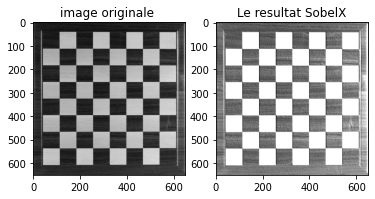

<Figure size 432x288 with 0 Axes>

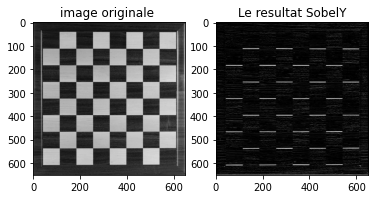

<Figure size 432x288 with 0 Axes>

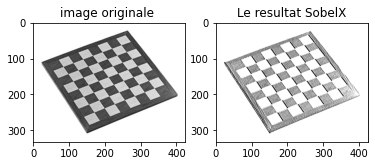

<Figure size 432x288 with 0 Axes>

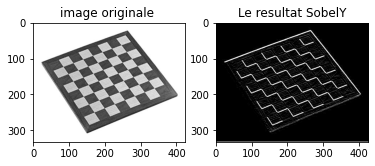

<Figure size 432x288 with 0 Axes>

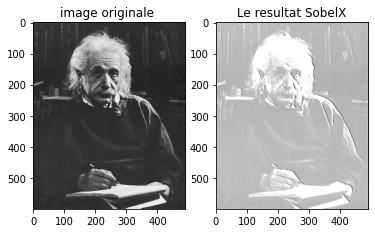

<Figure size 432x288 with 0 Axes>

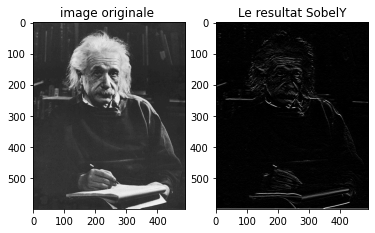

<Figure size 432x288 with 0 Axes>

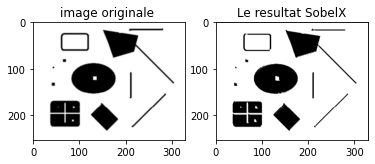

<Figure size 432x288 with 0 Axes>

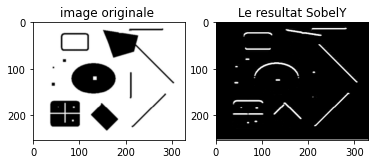

<Figure size 432x288 with 0 Axes>

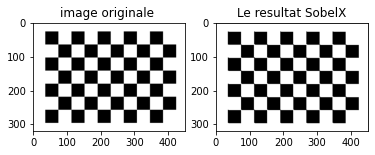

<Figure size 432x288 with 0 Axes>

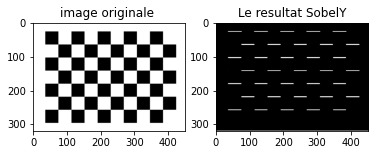

In [ ]:
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image1, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image1,filtreS_x,1,1), cmap='gray')
axarr[1].set_title('Le resultat SobelX')
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image1, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image1,filtreS_y,1,1), cmap='gray')
axarr[1].set_title('Le resultat SobelY')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image2, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image2,filtreS_x,1,1), cmap='gray')
axarr[1].set_title('Le resultat SobelX')
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image2, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image2,filtreS_y,1,1), cmap='gray')
axarr[1].set_title('Le resultat SobelY')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image3, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image3,filtreS_x,1,1), cmap='gray')
axarr[1].set_title('Le resultat SobelX')
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image3, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image3,filtreS_y,1,1), cmap='gray')
axarr[1].set_title('Le resultat SobelY')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image4, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image4,filtreS_x,1,1), cmap='gray')
axarr[1].set_title('Le resultat SobelX')
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image4, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image4,filtreS_y,1,1), cmap='gray')
axarr[1].set_title('Le resultat SobelY')



plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image5, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image5,filtreS_x,1,1), cmap='gray')
axarr[1].set_title('Le resultat SobelX')
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image5, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image5,filtreS_y,1,1), cmap='gray')
axarr[1].set_title('Le resultat SobelY')



#Filtre Perwitt

Text(0.5, 1.0, 'Le resultat PerwittY')

<Figure size 432x288 with 0 Axes>

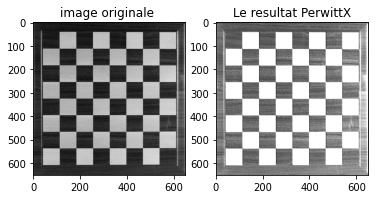

<Figure size 432x288 with 0 Axes>

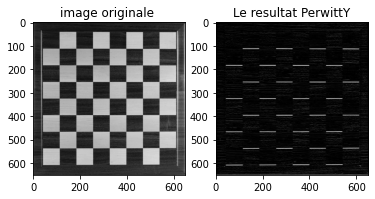

<Figure size 432x288 with 0 Axes>

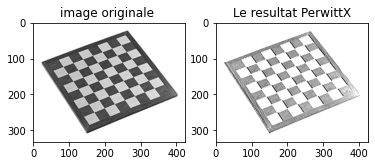

<Figure size 432x288 with 0 Axes>

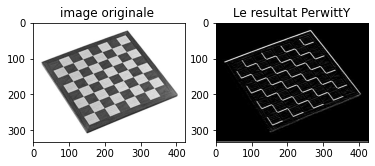

<Figure size 432x288 with 0 Axes>

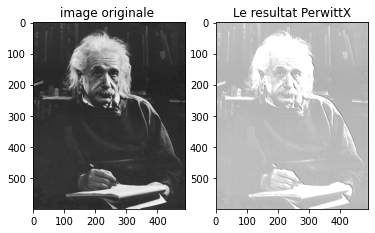

<Figure size 432x288 with 0 Axes>

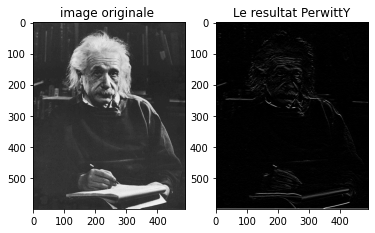

<Figure size 432x288 with 0 Axes>

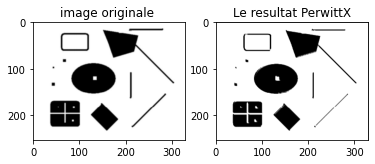

<Figure size 432x288 with 0 Axes>

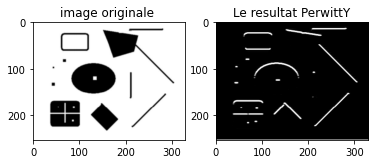

<Figure size 432x288 with 0 Axes>

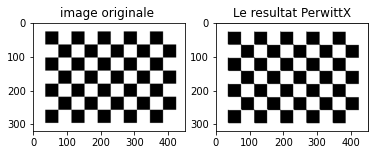

<Figure size 432x288 with 0 Axes>

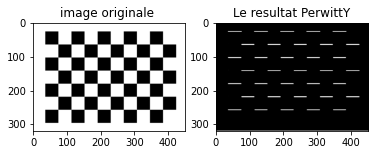

In [ ]:
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image1, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image1,filtreP_x,1,1), cmap='gray')
axarr[1].set_title('Le resultat PerwittX')
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image1, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image1,filtreP_y,1,1), cmap='gray')
axarr[1].set_title('Le resultat PerwittY')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image2, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image2,filtreP_x,1,1), cmap='gray')
axarr[1].set_title('Le resultat PerwittX')
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image2, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image2,filtreP_y,1,1), cmap='gray')
axarr[1].set_title('Le resultat PerwittY')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image3, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image3,filtreP_x,1,1), cmap='gray')
axarr[1].set_title('Le resultat PerwittX')
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image3, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image3,filtreP_y,1,1), cmap='gray')
axarr[1].set_title('Le resultat PerwittY')



plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image4, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image4,filtreP_x,1,1), cmap='gray')
axarr[1].set_title('Le resultat PerwittX')
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image4, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image4,filtreP_y,1,1), cmap='gray')
axarr[1].set_title('Le resultat PerwittY')



plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image5, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image5,filtreP_x,1,1), cmap='gray')
axarr[1].set_title('Le resultat PerwittX')
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image5, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(convolution(image5,filtreP_y,1,1), cmap='gray')
axarr[1].set_title('Le resultat PerwittY')


#Filtre de Gauss

Text(0.5, 1.0, 'Le resultat Gauss')

<Figure size 432x288 with 0 Axes>

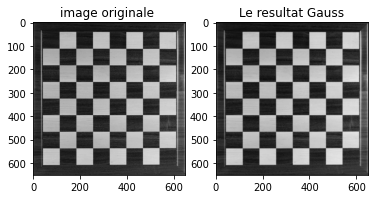

<Figure size 432x288 with 0 Axes>

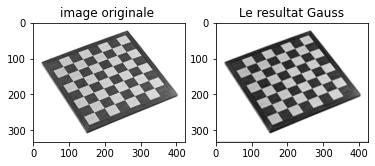

<Figure size 432x288 with 0 Axes>

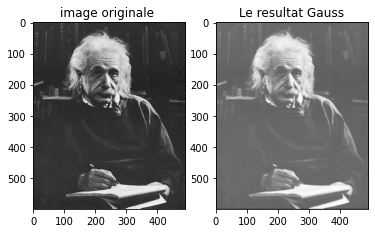

<Figure size 432x288 with 0 Axes>

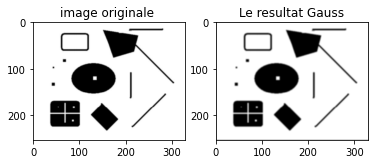

<Figure size 432x288 with 0 Axes>

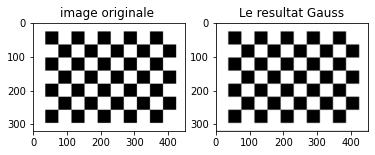

In [ ]:
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image1, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Filtre_gauss(image1), cmap='gray')
axarr[1].set_title('Le resultat Gauss')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image2, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Filtre_gauss(image2), cmap='gray')
axarr[1].set_title('Le resultat Gauss')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image3, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Filtre_gauss(image3), cmap='gray')
axarr[1].set_title('Le resultat Gauss')


plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image4, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Filtre_gauss(image4), cmap='gray')
axarr[1].set_title('Le resultat Gauss')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image5, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Filtre_gauss(image5), cmap='gray')
axarr[1].set_title('Le resultat Gauss')


#Filtre Moyen

Text(0.5, 1.0, 'Le resultat Moyen')

<Figure size 432x288 with 0 Axes>

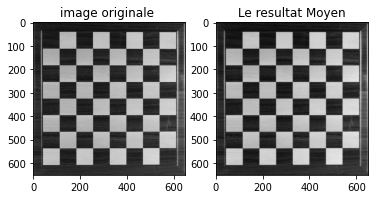

<Figure size 432x288 with 0 Axes>

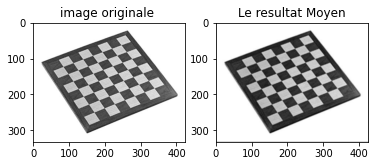

<Figure size 432x288 with 0 Axes>

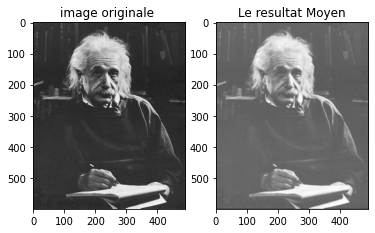

<Figure size 432x288 with 0 Axes>

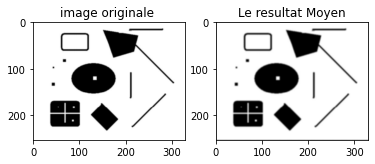

<Figure size 432x288 with 0 Axes>

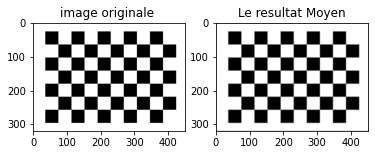

In [ ]:
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image1, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Filtre_Moyen(image1), cmap='gray')
axarr[1].set_title('Le resultat Moyen')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image2, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Filtre_Moyen(image2), cmap='gray')
axarr[1].set_title('Le resultat Moyen')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image3, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Filtre_Moyen(image3), cmap='gray')
axarr[1].set_title('Le resultat Moyen')


plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image4, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Filtre_Moyen(image4), cmap='gray')
axarr[1].set_title('Le resultat Moyen')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image5, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Filtre_Moyen(image5), cmap='gray')
axarr[1].set_title('Le resultat Moyen')

Text(0.5, 1.0, 'Le resultat Moyen')

<Figure size 432x288 with 0 Axes>

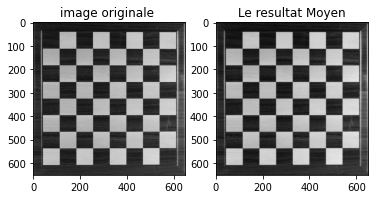

<Figure size 432x288 with 0 Axes>

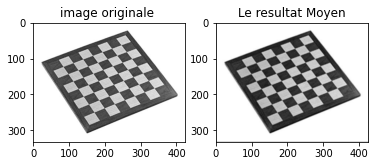

<Figure size 432x288 with 0 Axes>

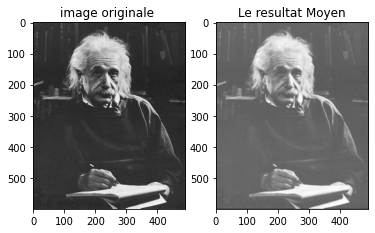

<Figure size 432x288 with 0 Axes>

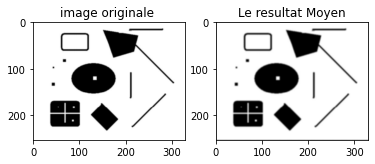

<Figure size 432x288 with 0 Axes>

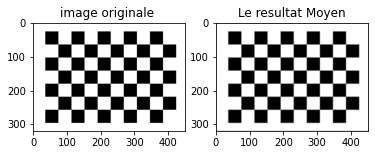

In [ ]:
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image1, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Filtre_Moyen(image1), cmap='gray')
axarr[1].set_title('Le resultat Moyen')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image2, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Filtre_Moyen(image2), cmap='gray')
axarr[1].set_title('Le resultat Moyen')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image3, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Filtre_Moyen(image3), cmap='gray')
axarr[1].set_title('Le resultat Moyen')


plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image4, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Filtre_Moyen(image4), cmap='gray')
axarr[1].set_title('Le resultat Moyen')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image5, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Filtre_Moyen(image5), cmap='gray')
axarr[1].set_title('Le resultat Moyen')



Text(0.5, 1.0, 'Le resultat Median')

<Figure size 432x288 with 0 Axes>

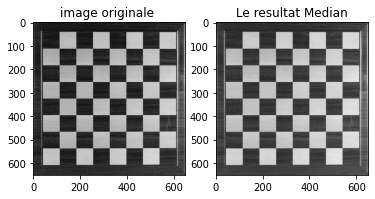

<Figure size 432x288 with 0 Axes>

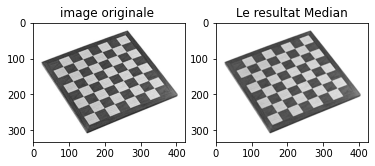

<Figure size 432x288 with 0 Axes>

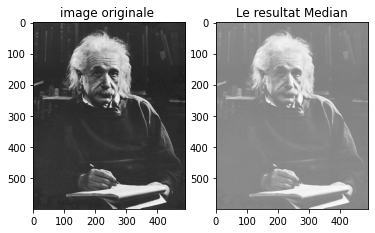

<Figure size 432x288 with 0 Axes>

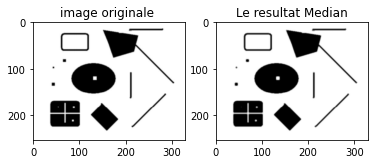

<Figure size 432x288 with 0 Axes>

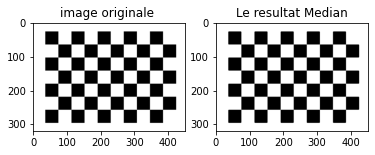

In [ ]:
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image1, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Median(image1), cmap='gray')
axarr[1].set_title('Le resultat Median')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image2, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Median(image2), cmap='gray')
axarr[1].set_title('Le resultat Median')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image3, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Median(image3), cmap='gray')
axarr[1].set_title('Le resultat Median')



plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image4, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Median(image4), cmap='gray')
axarr[1].set_title('Le resultat Median')

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image5, cmap='gray')
axarr[0].set_title("image originale ") 
axarr[1].imshow(Median(image5), cmap='gray')
axarr[1].set_title('Le resultat Median')

